In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/mcdonalds.csv")


In [12]:
df.describe

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


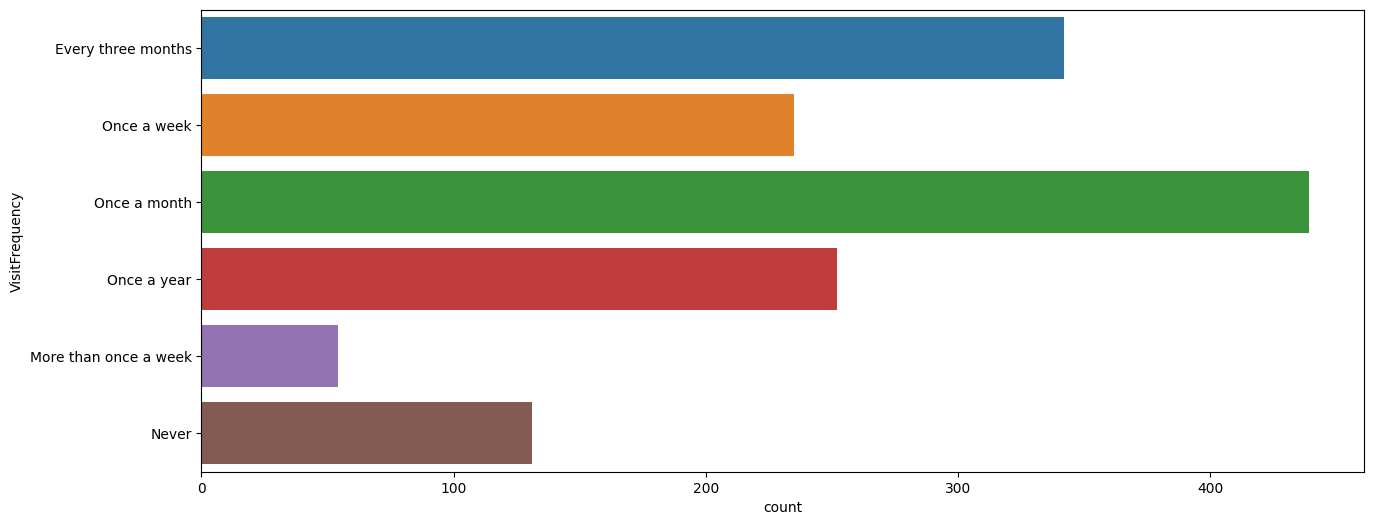

In [3]:
plt.figure(figsize=(15,6))
sns.countplot(y="VisitFrequency",data=df)
plt.show()

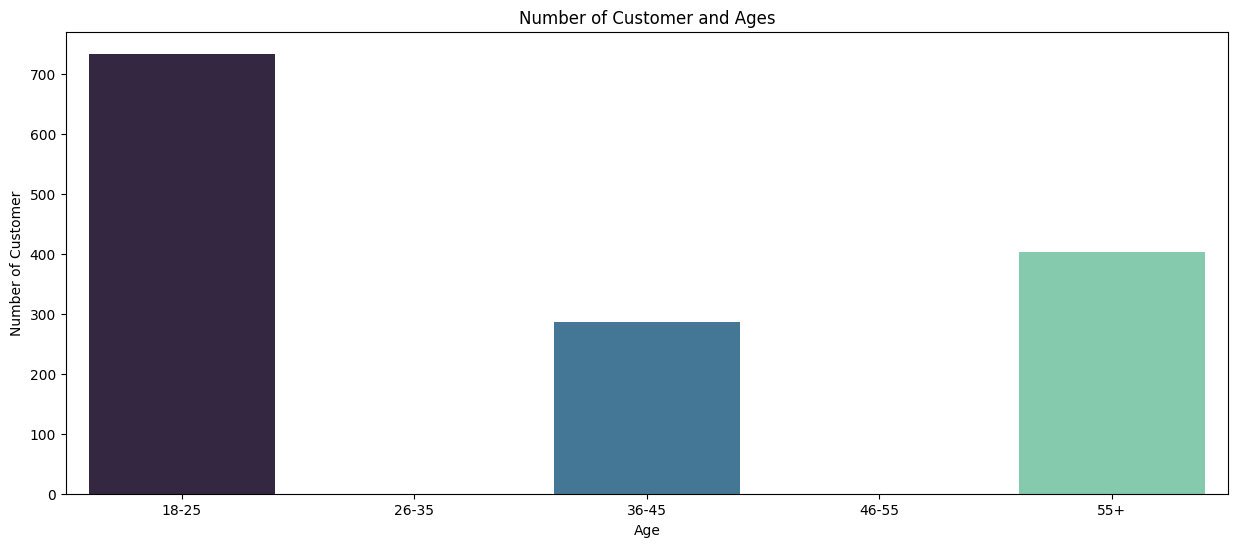

In [11]:
age_18_25=df.Age[(df.Age>- 18) & (df.Age - 25)]
age_26_35=df.Age[(df.Age >= 26) & (df.Age <- 35)]
age_36_45=df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55=df.Age[(df.Age >= 46) & (df.Age <- 55)]
age_55above= df.Age[df.Age >= 56]

agex=["18-25","26-35","36-45","46-55","55+"]

agey=[len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [20]:
print(kmeans.cluster_centers_)

[[25.80769231]
 [60.83647799]
 [44.9765625 ]
 [36.03184713]
 [56.02777778]
 [50.57068063]
 [20.94827586]
 [31.00704225]
 [66.5106383 ]
 [40.49541284]]


In [23]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Select all non-numeric columns except 'Age'
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.difference(['Age'])

# Apply one-hot encoding to these columns
df_encoded = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Display the resulting DataFrame with one-hot encoding
print(df_encoded.head())


   Age  Gender_Male  Like_-2  Like_-3  Like_-4  Like_0  Like_1  Like_2  \
0   61            0        0        1        0       0       0       0   
1   51            0        0        0        0       0       0       1   
2   62            0        0        0        0       0       1       0   
3   69            0        0        0        0       0       0       0   
4   49            1        0        0        0       0       0       1   

   Like_3  Like_4  ...  convenient_Yes  disgusting_Yes  expensive_Yes  \
0       0       0  ...               1               0              1   
1       0       0  ...               1               0              1   
2       0       0  ...               1               0              1   
3       0       1  ...               1               1              0   
4       0       0  ...               1               0              0   

   fast_Yes  fattening_Yes  greasy_Yes  healthy_Yes  spicy_Yes  tasty_Yes  \
0         1              1           0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

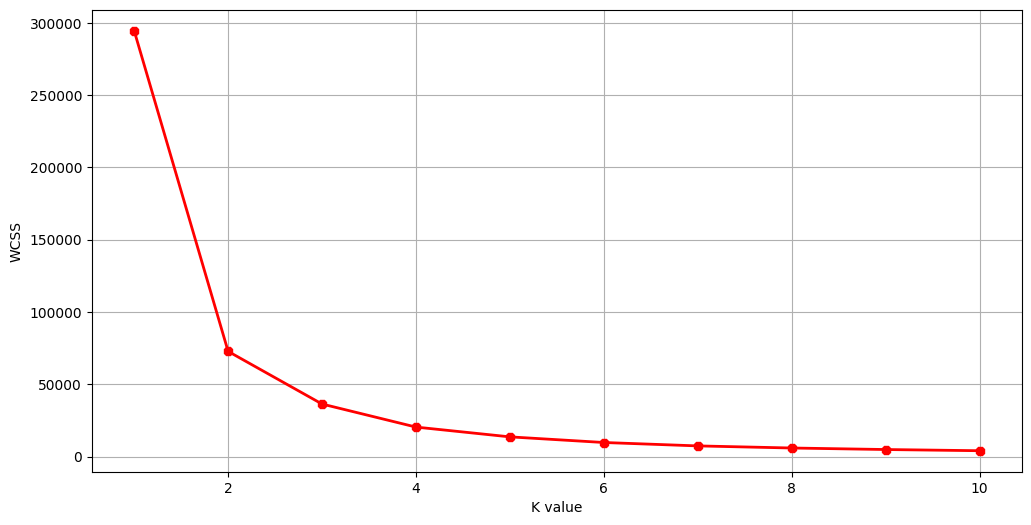

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you've already encoded the non-numeric features into 'df_encoded'

selected_features = ["Age", "Gender_Male", "yummy_Yes", "convenient_Yes"]

# Create a DataFrame with the selected features
X = df_encoded[selected_features]

# Determine the optimal number of clusters (K)
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

# Plot the WCSS values to choose the optimal K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), WCSS, linewidth=2, color="red", marker="8")
plt.grid()
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)
labels = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


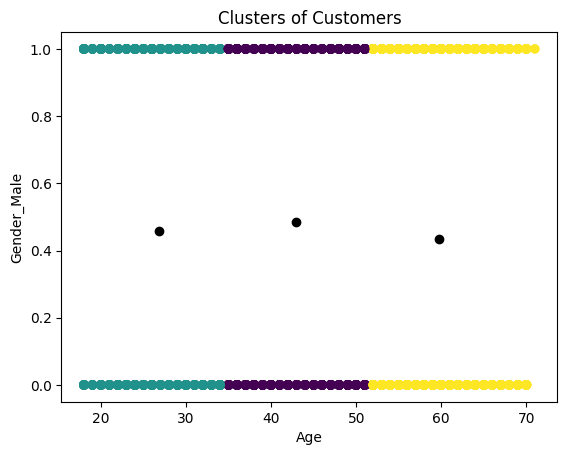

In [38]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Gender_Male")
plt.show()